In [190]:
from keras.datasets import cifar10
import ssl
import cv2
ssl._create_default_https_context = ssl._create_unverified_context
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# import numpy as np
x_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [80]:
import os
import numpy as np
import shutil
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

dir = r'C:\Users\annab\Documents\Coding\cs370\WISE_Files_ALL'
ext = ('.fits')
ctr = 0
hii = []

for subfolder in os.listdir(dir):
    foldername = os.path.join(dir, subfolder)
    print(foldername)
    for file in os.listdir(foldername):
        f = os.path.join(foldername, file)
        if os.path.isfile(f):
            image_file = get_pkg_data_filename(f)
            image_data = fits.getdata(image_file, ext=0)
#             list.append(image_data)
            hii.append(np.resize(image_data, (32, 32)))
            if ctr < 1:
                print(image_data)
                print(f)
                print("type: ", type(image_data))
                ctr += 1
                print(image_data.shape)
#                 print(np.resize(image_data, (32, 32)))
    print(len(hii))

C:\Users\annab\Documents\Coding\cs370\WISE_Files_ALL\WISE_Files_0
[[4.699418  4.6904907 4.661808  4.6453857 4.6578703 4.683215  4.699875
  4.6974983 4.676898 ]
 [4.668316  4.6677837 4.650323  4.64044   4.649028  4.6619635 4.6651993
  4.6561317 4.6407547]
 [4.6405115 4.652323  4.65162   4.651887  4.658489  4.6607885 4.651823
  4.6322756 4.612836 ]
 [4.638956  4.66761   4.689309  4.7053947 4.7140636 4.7081833 4.6845245
  4.6468735 4.6111984]
 [4.672879  4.722247  4.7720165 4.8104906 4.8281965 4.818137  4.7773447
  4.7135124 4.649194 ]
 [4.7258215 4.7960024 4.8754253 4.9431534 4.981552  4.976121  4.9217815
  4.8291664 4.7278423]
 [4.7724905 4.8578625 4.962784  5.0616703 5.1288385 5.1401863 5.08288
  4.9683256 4.830323 ]
 [4.7966576 4.886098  5.004554  5.126916  5.222374  5.25766   5.210989
  5.0898314 4.927723 ]
 [4.7950344 4.8759336 4.9904575 5.1172943 5.2285595 5.286913  5.2620306
  5.1533804 4.989834 ]]
C:\Users\annab\Documents\Coding\cs370\WISE_Files_ALL\WISE_Files_0\0000m016_ac51-w1-

In [191]:
# x_trl = x_train.tolist()
# for i in range(1700):
#     x_trl.append()
hii_train = np.array(hii[:1700])
hii_test = np.array(hii[1700:])
hii_train = hii_train.reshape(hii_train.shape[0], hii_train.shape[1], hii_train.shape[2], 1)
hii_test = hii_test.reshape(hii_test.shape[0], hii_test.shape[1], hii_test.shape[2], 1)
x_train = np.append(x_train, hii_train, axis=0)
x_test = np.append(x_test, hii_test, axis=0)
print('x_train shape:', x_train.shape)
# print(x_train[51000], hii_test[0].shape)
print('x_test shape:', x_test.shape)

x_train shape: (51700, 32, 32, 1)
x_test shape: (10296, 32, 32, 1)


In [192]:
print('y_train shape:', y_train.shape)
labels_train = np.full((1700,1), 10)
labels_test = np.full(((296),1), 10)
print("lol", labels_test.shape)
# for i in range(1700):
#     labels.append(11)
y_train = np.append(y_train, labels_train, axis=0)
y_test = np.append(y_train, labels_test, axis=0)
print(y_train[51000])

y_train shape: (50000, 1)
lol (296, 1)
[10]


In [124]:
print(x_train[0][0])
# print(type(x_train), type(x_train[0]))

[[ 62.]
 [ 45.]
 [ 47.]
 [ 52.]
 [ 70.]
 [ 86.]
 [101.]
 [105.]
 [112.]
 [115.]
 [ 98.]
 [ 95.]
 [111.]
 [108.]
 [101.]
 [ 93.]
 [101.]
 [100.]
 [ 90.]
 [105.]
 [104.]
 [ 97.]
 [ 99.]
 [102.]
 [114.]
 [125.]
 [131.]
 [124.]
 [125.]
 [128.]
 [121.]
 [120.]]


In [111]:
import matplotlib.pyplot as plt
%matplotlib inline

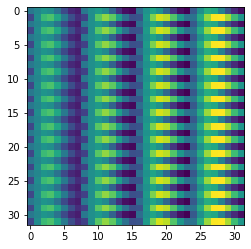

In [193]:
img = plt.imshow(x_train[51011])

In [63]:
print('The label is:', y_train[0])

The label is: [6]


In [126]:
print('The label is:', y_train[1])

The label is: [9]


In [138]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.utils import np_utils
print(y_train.shape, np.amax(y_test))
y_train_one_hot = keras.utils.np_utils.to_categorical(y_train, 11)
y_test_one_hot = keras.utils.np_utils.to_categorical(y_test, 11)
# y_train_one_hot = keras.utils.to_categorical(y_train, 10)
# y_test_one_hot = keras.utils.to_categorical(y_test, 10)

(51700, 1) 10


In [139]:
print('The one hot label is:', y_train_one_hot[1])

The one hot label is: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [140]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255

In [159]:
input_shape = x_train[0].shape
x_train[0]

array([[[0.24313726],
        [0.1764706 ],
        [0.18431373],
        ...,
        [0.5019608 ],
        [0.4745098 ],
        [0.47058824]],

       [[0.07843138],
        [0.        ],
        [0.02745098],
        ...,
        [0.32156864],
        [0.3019608 ],
        [0.32156864]],

       [[0.09019608],
        [0.02352941],
        [0.09411765],
        ...,
        [0.30588236],
        [0.30588236],
        [0.26666668]],

       ...,

       [[0.59607846],
        [0.48235294],
        [0.49019608],
        ...,
        [0.45882353],
        [0.10588235],
        [0.1254902 ]],

       [[0.5137255 ],
        [0.40784314],
        [0.4509804 ],
        ...,
        [0.53333336],
        [0.22745098],
        [0.2       ]],

       [[0.54509807],
        [0.48235294],
        [0.50980395],
        ...,
        [0.68235296],
        [0.4392157 ],
        [0.3529412 ]]], dtype=float32)

In [194]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, MaxPool2D
# from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping

In [195]:
model = Sequential()

In [196]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), 
    padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(11, activation='softmax'))

In [197]:
model.summary()
print(y_train.shape)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 32, 32, 16)        160       
                                                                 
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 16, 16, 16)        9232      
                                                                 
 conv2d_35 (Conv2D)          (None, 16, 16, 32)        4640      
                                                      

In [198]:
model.compile(loss='categorical_crossentropy', 
     optimizer='adam',
     metrics=['acc'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [199]:
# history = model.fit(x_train, y_train_one_hot, epochs=2, batch_size=32, validation_data=(x_test, y_test_one_hot))
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=20, 
           validation_split=0.2)

Epoch 1/20
1293/1293 [==============================] - 107s 83ms/step - loss: 1.8001 - acc: 0.3365 - val_loss: 2.9658 - val_acc: 0.3690
Epoch 2/20
1293/1293 [==============================] - 112s 87ms/step - loss: 1.4229 - acc: 0.4923 - val_loss: 3.8355 - val_acc: 0.4485
Epoch 3/20
1293/1293 [==============================] - 118s 91ms/step - loss: 1.2711 - acc: 0.5523 - val_loss: 3.9372 - val_acc: 0.4795
Epoch 4/20
1293/1293 [==============================] - 108s 83ms/step - loss: 1.1719 - acc: 0.5885 - val_loss: 4.4833 - val_acc: 0.4974
Epoch 5/20
1293/1293 [==============================] - 117s 90ms/step - loss: 1.0884 - acc: 0.6204 - val_loss: 4.1457 - val_acc: 0.5278
Epoch 6/20
1293/1293 [==============================] - 130s 101ms/step - loss: 1.0152 - acc: 0.6452 - val_loss: 4.3299 - val_acc: 0.5109
Epoch 7/20
1293/1293 [==============================] - 111s 86ms/step - loss: 0.9652 - acc: 0.6653 - val_loss: 4.5226 - val_acc: 0.5310
Epoch 8/20
1293/1293 [==================

In [158]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train[0].shape))

ValueError: Input 0 of layer "conv2d_9" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

In [145]:
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

In [146]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [147]:
model.add(Dropout(0.25))

In [148]:
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [149]:
model.add(Flatten())

In [150]:
model.add(Dense(512, activation='relu'))

In [151]:
model.add(Dropout(0.5))

In [152]:
model.add(Dense(11, activation='softmax'))

In [153]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [154]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [172]:
hist = model.fit(x_train, y_train_one_hot, 
           batch_size=32, epochs=2, 
           validation_split=0.2)

Epoch 1/2


ValueError: in user code:

    File "C:\Users\annab\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
        return self.compiled_loss(
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\annab\anaconda3\lib\site-packages\keras\backend.py", line 5083, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 11) and (None, 10) are incompatible


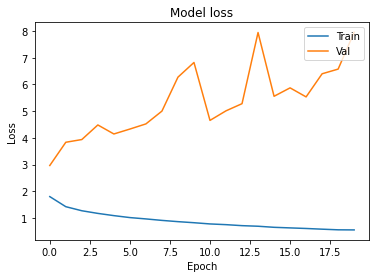

In [200]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

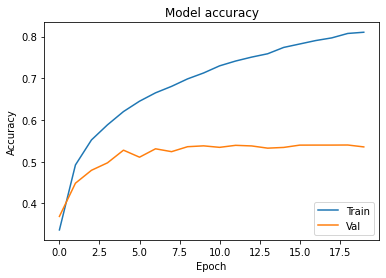

In [204]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [208]:
model.evaluate(x_test, y_test_one_hot)[1]

1616/1616 [==============================] - 36s 22ms/step - loss: 1.8397 - acc: 0.8390


0.8389748334884644

In [210]:
model.evaluate(x_test, y_test_one_hot)[1]

ValueError: Data cardinality is ambiguous:
  x sizes: 10296
  y sizes: 51996
Make sure all arrays contain the same number of samples.

In [206]:
model.save('my_cifar10_model.h5')

In [32]:
my_image = plt.imread("cat.jpg")

In [33]:
from skimage.transform import resize
my_image_resized = resize(my_image, (32,32,3))

D:\Anaconda3\envs\intuitive-deep-learning\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
D:\Anaconda3\envs\intuitive-deep-learning\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


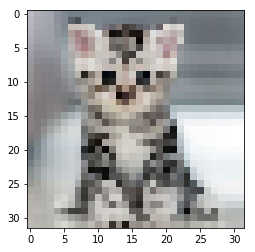

In [34]:
img = plt.imshow(my_image_resized)

In [35]:
import numpy as np
probabilities = model.predict(np.array( [my_image_resized,] ))

In [36]:
probabilities

array([[0.00581452, 0.00405185, 0.02275212, 0.31140402, 0.01715197,
        0.1401798 , 0.07874653, 0.296455  , 0.00255446, 0.12088975]],
      dtype=float32)

In [37]:
number_to_class = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
index = np.argsort(probabilities[0,:])
print("Most likely class:", number_to_class[index[9]], "-- Probability:", probabilities[0,index[9]])
print("Second most likely class:", number_to_class[index[8]], "-- Probability:", probabilities[0,index[8]])
print("Third most likely class:", number_to_class[index[7]], "-- Probability:", probabilities[0,index[7]])
print("Fourth most likely class:", number_to_class[index[6]], "-- Probability:", probabilities[0,index[6]])
print("Fifth most likely class:", number_to_class[index[5]], "-- Probability:", probabilities[0,index[5]])

Most likely class: cat -- Probability: 0.31140402
Second most likely class: horse -- Probability: 0.296455
Third most likely class: dog -- Probability: 0.1401798
Fourth most likely class: truck -- Probability: 0.12088975
Fifth most likely class: frog -- Probability: 0.078746535
